In [1]:
import mido
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
import time

In [3]:
df = pd.read_pickle("PianoRollData.pkl")

In [4]:
print(f"Número de músicas: {len(df)}")

Número de músicas: 1157


In [5]:
clean_df = df.copy()
clean_df = clean_df.loc[clean_df["duration"] < 600, :]
clean_df = clean_df.loc[clean_df["duration"] > 10, :]

In [6]:
first_loss = len(df) - len(clean_df)
print(f"Número de músicas perdidas no processo: {first_loss}")

Número de músicas perdidas no processo: 179


In [7]:
clean_df = clean_df.sort_values('tick_beat', ascending=True)
# clean_df.tick_beat = clean_df.tick_beat.astype('string')
clean_df = clean_df.loc[(clean_df['tick_beat'] == 48.0)  | 
                        (clean_df['tick_beat'] == 96.0)  |
                        (clean_df['tick_beat'] == 120.0) |
                        (clean_df['tick_beat'] == 192.0) |
                        (clean_df['tick_beat'] == 240.0) |
                        (clean_df['tick_beat'] == 336.0) |
                        (clean_df['tick_beat'] == 384.0) |
                        (clean_df['tick_beat'] == 480.0) |
                        (clean_df['tick_beat'] == 960.0) |
                        (clean_df['tick_beat'] == 1024.0),
                        :] 

In [8]:
second_loss =  len(df) - len(clean_df) - first_loss
print(f"Número de músicas perdidas no processo: {second_loss}")

Número de músicas perdidas no processo: 40


In [9]:
tpb = dict(sorted(dict(clean_df.value_counts("tick_beat")).items()))
new_tpb = {}

for k, v in tpb.items():
    new_tpb[str(k)] = v

tpb_str = new_tpb.copy()

for k, v in new_tpb.items():
    if v < int(len(df)*0.01):
        tpb_str.pop(k)

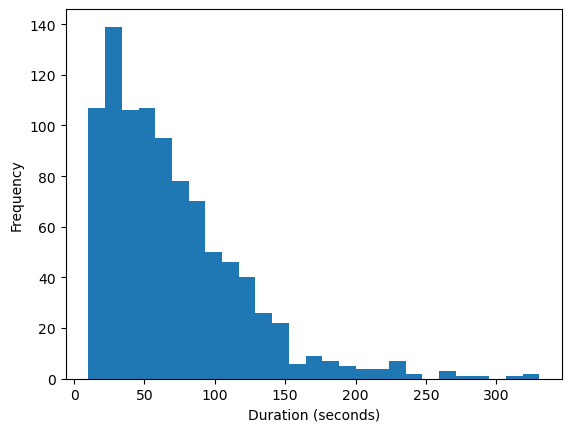

In [10]:
n, bins, patches = plt.hist(x=clean_df["duration"], bins='auto')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

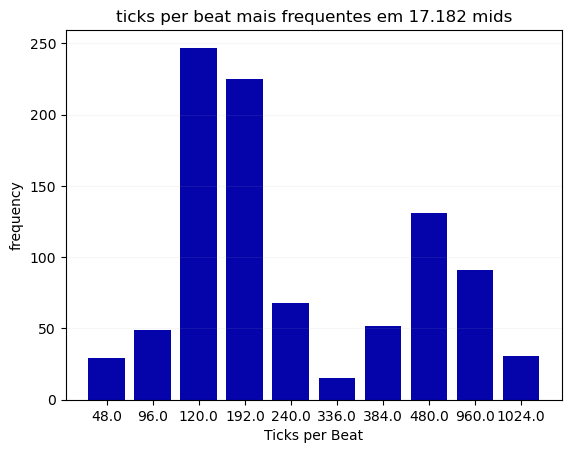

In [11]:
# creating the dataset
tpbs = list(tpb_str.keys())
frequency = list(tpb_str.values())

# creating the bar plot
plt.bar(tpbs, frequency, color='#0504aa')
plt.grid(axis='y', alpha=0.1)
plt.xlabel("Ticks per Beat")
plt.ylabel("frequency")
plt.title("ticks per beat mais frequentes em 17.182 mids")
plt.show()

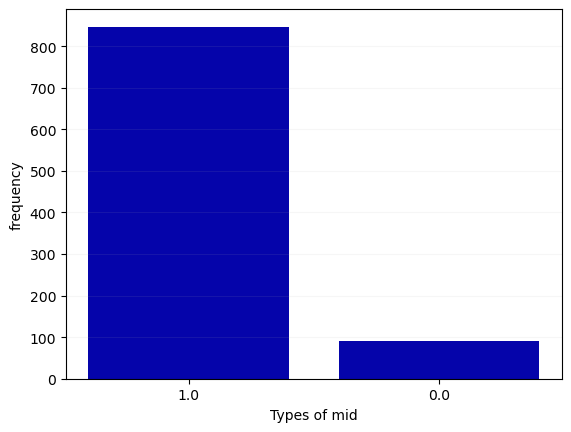

In [12]:
dict_types = dict(clean_df.value_counts("type"))

# creating the dataset
types = [str(k) for k in dict_types.keys()]
frequency = dict_types.values()

# creating the bar plot
plt.bar(types, frequency, color='#0504aa')
plt.grid(axis='y', alpha=0.1)
plt.xlabel("Types of mid")
plt.ylabel("frequency")
plt.show()